# Dataset exploration

In [118]:
# Load the Pandas libraries with alias 'pd' 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Traffic data

https://www.opendata.dk/vejdirektoratet/stojdata-mastra

http://noegletal.dk/noegletal/

| Variable name | Description |
|---------------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| DATAEJER | The owner of the traffic key figures - is displayed as the municipality number. The Road Directorate stands as data owner 0. |
| VEJBESTYRER | The road manager at the counting point - appears as a municipality number. The Road Directorate stands as road manager 0. |
| VEJNR | The administrative road number as stated in CVF (The Central Road and Path List, see cvf.dk) |
| VEJDEL | The road section of the counting point, in some municipalities also referred to as the Side Road Number. Is generally '0', or starts with '0', for regular road. |
| VEJNAVN | The name of the road at the counting point. |
| KILOMETER | The mileage indication - the counting point has a so-called mileage (stationing), which is typically the distance from the start of the road to the counting point; The mileage is then the mileage part of the mileage. |
| METER | As above, it is just a meter part of the mileage. |
| LOKATION | Description of the counting location |
| KOMMUNE | The municipality number at the counting point |
| KOERETOEJSART | Vehicle type, either Motor Vehicles (MOTORCTJ) or Bicycle moped (C / K) |
| AAR | The year in which the count, or counts, were performed. |
| AADT | Listed figures for annual traffic. Average number of vehicles per 24hour, taken over all days of the year. |
| HDT | Listed figures for Everyday Day traffic. Average number of vehicles per 24hour taken over all weekdays of the year. Weekends, summer vacation period and holidays are not included |
| JDT | Enumerated figures for July-Day traffic - traffic on a day in July |
| TRAFIKTYPE | The type of traffic, which says something about the distribution of traffic over the year. |
| GNS_HASTIGHED | The average measured speed of the counting point. |
| TALTE_DAGE | Number of days counted within the year. |
| AE10HOEJ | Equivalent 10-ton axes, usually referred to as Æ10 - a measure of the load of the road's bearing layer, calculated here for roads outside a designated urban area |
| AE10LAV | Like AE10HOEJ, but in a decidedly urban area. |
| LBIL_AADT | Truck EIGHT - EIGHT for trucks, here defined as vehicles with a total length of more than 5.80 meters. |
| HAST_GRAENSE | The speed limit applicable at the counting point. |
| FRAKTIL_PCT_15 | ! 5% speed quantile - the speed at which 15% of vehicles drive. |
| FRAKTIL_PCT_85 | 85% speed quantile - the speed at which 85% of vehicles drive. |
| PCT_OVER_HASTGR | Percentage of vehicles traveling above the speed limit, ie "too fast". |
| PCT_OVER_HASTGR_P10 | Percentage of vehicles traveling above the speed limit + 10km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 70km/h. |
| PCT_OVER_HASTGR_P20 | Percentage of vehicles traveling above the speed limit + 20km / h - if the speed limit is 60km/h, that is the percentage of vehicles that drive above 80km/h. |
| LBIL_PCT | The percentage of trucks taken in relation to the total amount of motor vehicles. Trucks here are vehicles with a total length of more than 5.80 meters. |

In [119]:
traffic_data = pd.read_csv("dataset/trafficdata_withlonlat_ver2.csv", encoding="ISO-8859-1")
traffic_data.head()

,FID,Dataowner,RoadManager,RoadId,RoadPartId,RoadName,Kilometer,Meter,Location,Municipality,...,SpeedLimit,Quantile15,Quantile85,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Coordinates,Longitude,Latitude
0,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,751,751.0,7511252,0,Christian XÂ´s Vej,0.0,540.0,Ml. Ellehammervej og Marconivej,751.0,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,POINT (573014.0000013472 6221529.999744055),10.174776,56.133225937782534;
1,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851.0,8515246,0,Marathonvej,0.0,180.0,Fabriksparken / Hobrovej,851.0,...,50.0,34.8,53.9,27.1,3.7,0.4,3.3,POINT (551965.0000006577 6315761.999742397),9.855032,56.982481704333544;
2,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,851,851.0,8516178,0,Offenbachsvej,0.0,222.0,Mozartsvej / TelemannsvÃ¦nget,851.0,...,50.0,27.1,42.3,1.4,0.1,0.0,1.7,POINT (549415.0000006119 6318575.999742349),9.813631,57.008038318905875;
3,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OPEN_DATA_NOEGLETAL_VIEW.fid--1778853a_17153ca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
traffic_data.shape

(26917, 31)

In [121]:
#Check that he FID variable is unique for each observation
traffic_data.FID.unique().size

26917

In [122]:
traffic_data.dtypes

FID                             object
Dataowner                       object
RoadManager                    float64
RoadId                          object
RoadPartId                      object
RoadName                        object
Kilometer                      float64
Meter                          float64
Location                        object
Municipality                   float64
TypeOfVehicle                   object
Year                           float64
AverageDailyVehicles           float64
AverageWeekdayDailyVehicles    float64
DailyJulyTraffic               float64
Traffictype                     object
AverageSpeed                   float64
CountedDays                    float64
AE10High                       float64
AE10Low                        float64
AverageDailyTrucks             float64
SpeedLimit                      object
Quantile15                     float64
Quantile85                      object
PctOverSpeedLimit              float64
PctOverSpeedLimit10      

In [123]:
traffic_data.describe()

,RoadManager,Kilometer,Meter,Municipality,Year,AverageDailyVehicles,AverageWeekdayDailyVehicles,DailyJulyTraffic,AverageSpeed,CountedDays,AE10High,AE10Low,AverageDailyTrucks,Quantile15,PctOverSpeedLimit,PctOverSpeedLimit10,PctOverSpeedLimit20,PctOfTrucks,Longitude
count,23835.000000,23835.000000,23835.000000,23835.000000,23835.000000,23834.000000,23809.000000,23835.000000,20302.000000,23835.000000,17543.000000,15084.000000,17543.000000,18775.000000,18663.000000,18663.000000,18663.000000,17528.000000,23834.000000
mean,454.053535,11.220390,380.595343,529.148676,2016.506650,3615.603298,3999.301525,3433.815649,47.224569,18.600445,408.581599,64.097149,362.561780,39.441715,23.288282,7.290977,2.151610,7.727071,10.441854
std,280.212598,75.848759,293.183152,224.075113,9.797342,8851.874588,9726.566289,8784.297343,21.297533,32.247161,1704.043324,175.487237,1109.899104,18.874681,25.344030,11.926588,5.414962,5.901951,1.348268
min,0.000000,0.000000,0.000000,0.000000,572.000000,-24.000000,-25.000000,-20.000000,0.000000,0.200000,0.000000,0.000000,-74.000000,3.400000,0.000000,-7.700000,-17.200000,-3.100000,8.114568
25%,210.000000,0.000000,131.000000,320.000000,2015.000000,213.000000,234.000000,200.000000,31.100000,7.100000,13.000000,6.000000,26.000000,25.000000,0.900000,0.100000,0.000000,3.900000,9.453965
50%,550.000000,0.000000,320.000000,580.000000,2017.000000,962.000000,1074.000000,862.000000,45.000000,8.000000,50.000000,20.000000,88.000000,37.400000,13.300000,2.000000,0.400000,6.800000,9.967369
75%,710.000000,4.000000,600.000000,740.000000,2019.000000,3474.750000,3883.000000,3119.500000,59.000000,11.900000,185.000000,63.000000,288.000000,48.600000,40.700000,9.600000,2.000000,10.000000,11.937373
max,860.000000,10392.000000,8700.000000,990.000000,2020.000000,134915.000000,144973.000000,138913.000000,120.500000,365.800000,33839.000000,6750.000000,29273.000000,102.400000,100.000000,99.900000,93.400000,115.900000,15.149853


#### Kommune variable
There should be max 98 Danish Municipalities. However, there are 102.

(http://www.maerkdinbygning.dk/materiale/files/materiale-konsulenter/energimarkning/1507-nyeoggamlekommunenumre.pdf)

In [124]:
#Check the KOMMUNE variable
traffic_data.Municipality.unique().size

103

In [125]:
kommune_code = [101,147,151,153,155,157,159,161,163,165,167,169,173,175,183,185,187,190,201,210,217,219,223,230,240,250,253,259,260,265,269,270,306,316,320,326,329,330,336,340,350,360,370,376,390,400,410,420,430,440,450,461,479,480,482,492,510,530,540,550,561,563,573,575,580,607,615,621,630,657,661,665,671,706,707,710,727,730,740,741,746,751,756,760,766,773,779,787,791,810,813,820,825,840,846,849,851,860]
kommune_name = ["København","Frederiksberg","Ballerup","Brøndby","Dragør","Gentofte","Gladsaxe","Glostrup","Herlev","Albertslund","Hvidovre","Høje-Taastrup","Lyngby-Taarbæk","Rødovre","Ishøj","Tårnby","Vallensbæk","Furesø","Allerød","Fredensborg","Helsingør","Hillerød","Hørsholm","Rudersdal","Egedal","Frederikssund","Greve","Køge","Halsnæs","Roskilde","Solrød","Gribskov","Odsherred","Holbæk","Faxe","Kalundborg","Ringsted","Slagelse","Stevns","Sorø","Lejre","Lolland","Næstved","Guldborgsund","Vordingborg","Bornholm","Middelfart","Assens","Faaborg-Midtfyn","Kerteminde","Nyborg","Odense","Svendborg","Nordfyns","Langeland","Ærø","Haderslev","Billund","Sønderborg","Tønder","Esbjerg","Fanø","Varde","Vejen","Aabenraa","Fredericia","Horsens","Kolding","Vejle","Herning","Holstebro","Lemvig","Struer","Syddjurs","Norddjurs","Favrskov","Odder","Randers","Silkeborg","Samsø","Skanderborg","Aarhus","Ikast-Brande","Ringkøbing-Skjern","Hedensted","Morsø","Skive","Thisted","Viborg","Brønderslev","Frederikshavn","Vesthimmerlands","Læsø","Rebild","Mariagerfjord","Jammerbugt","Aalborg","Hjørring"]

kommune_dictionary = dict(zip(kommune_name, kommune_code))
inverse_dictionary = dict(zip(kommune_code, kommune_name))

inverse_dictionary

{101: 'København',
 147: 'Frederiksberg',
 151: 'Ballerup',
 153: 'Brøndby',
 155: 'Dragør',
 157: 'Gentofte',
 159: 'Gladsaxe',
 161: 'Glostrup',
 163: 'Herlev',
 165: 'Albertslund',
 167: 'Hvidovre',
 169: 'Høje-Taastrup',
 173: 'Lyngby-Taarbæk',
 175: 'Rødovre',
 183: 'Ishøj',
 185: 'Tårnby',
 187: 'Vallensbæk',
 190: 'Furesø',
 201: 'Allerød',
 210: 'Fredensborg',
 217: 'Helsingør',
 219: 'Hillerød',
 223: 'Hørsholm',
 230: 'Rudersdal',
 240: 'Egedal',
 250: 'Frederikssund',
 253: 'Greve',
 259: 'Køge',
 260: 'Halsnæs',
 265: 'Roskilde',
 269: 'Solrød',
 270: 'Gribskov',
 306: 'Odsherred',
 316: 'Holbæk',
 320: 'Faxe',
 326: 'Kalundborg',
 329: 'Ringsted',
 330: 'Slagelse',
 336: 'Stevns',
 340: 'Sorø',
 350: 'Lejre',
 360: 'Lolland',
 370: 'Næstved',
 376: 'Guldborgsund',
 390: 'Vordingborg',
 400: 'Bornholm',
 410: 'Middelfart',
 420: 'Assens',
 430: 'Faaborg-Midtfyn',
 440: 'Kerteminde',
 450: 'Nyborg',
 461: 'Odense',
 479: 'Svendborg',
 480: 'Nordfyns',
 482: 'Langeland',
 492

In [126]:
#Remove observations with unexsting kommune code
traffic_data = traffic_data[traffic_data.Municipality.isin(kommune_dictionary.values())]

In [127]:
traffic_data.Municipality.unique().size

92

In [128]:
np.sort(traffic_data.Municipality.unique())

array([101., 147., 151., 153., 157., 159., 161., 163., 165., 167., 169.,
       173., 175., 183., 185., 187., 190., 201., 210., 217., 219., 230.,
       240., 250., 253., 259., 260., 265., 269., 270., 306., 316., 320.,
       326., 329., 330., 336., 340., 350., 360., 370., 376., 390., 400.,
       410., 420., 430., 440., 450., 461., 479., 480., 482., 510., 530.,
       540., 550., 561., 573., 575., 580., 607., 615., 621., 630., 657.,
       661., 665., 671., 706., 707., 710., 727., 730., 740., 746., 751.,
       756., 760., 766., 773., 779., 787., 791., 810., 813., 820., 840.,
       846., 849., 851., 860.])

In [129]:
traffic_data['MunicipalityName'] = traffic_data.Municipality.map(inverse_dictionary)

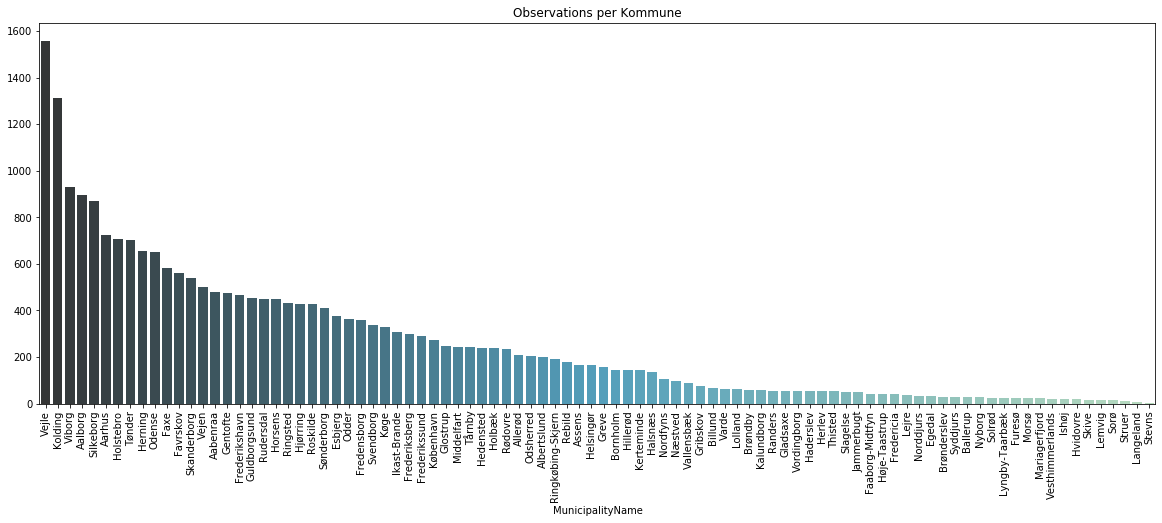

In [130]:
plt.figure(figsize=(20,7))
plt.title("Observations per Kommune")
df = traffic_data.groupby('MunicipalityName').FID.count().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order=df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### AAR variable

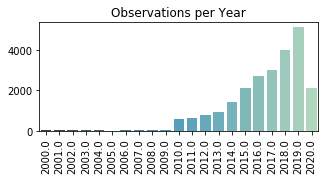

In [131]:
plt.figure(figsize=(5,2))
plt.title("Observations per Year")
df = traffic_data.Year.value_counts()
ax = sns.barplot(df.keys(), df.values, order=df.keys().sort_values(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

#### Number of cars in 24h (AADT, HDT, JDT)

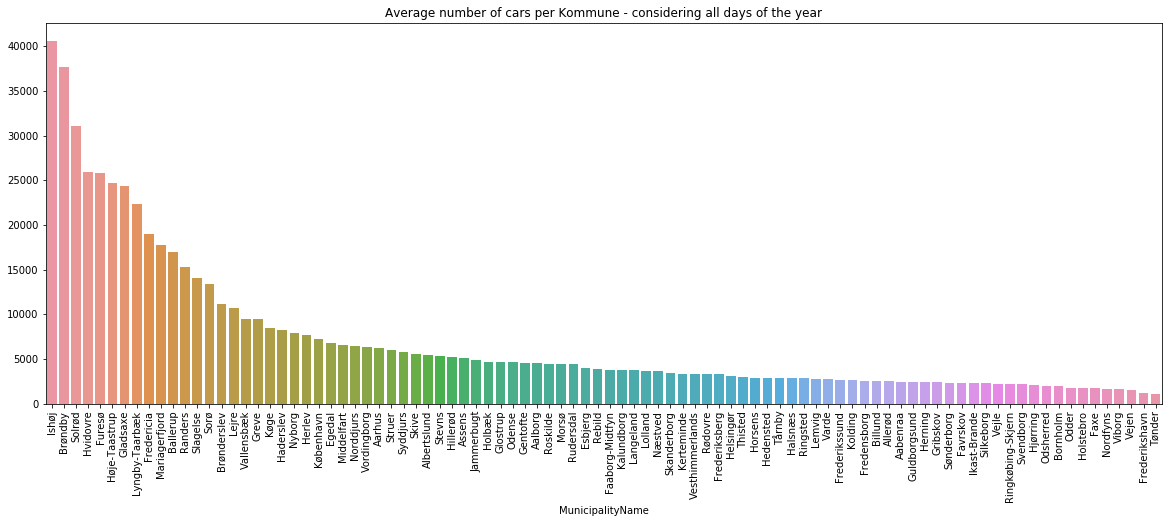

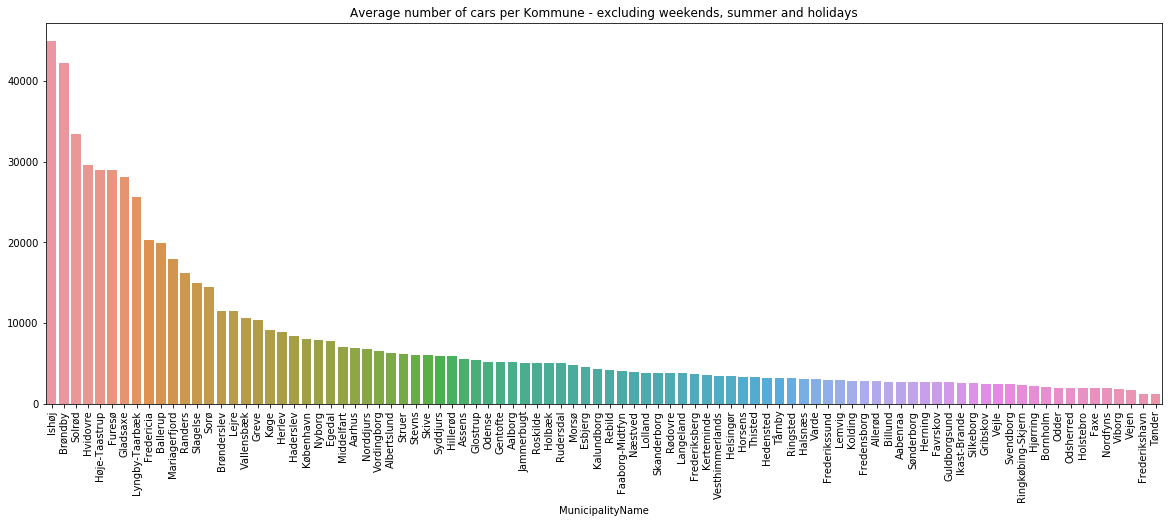

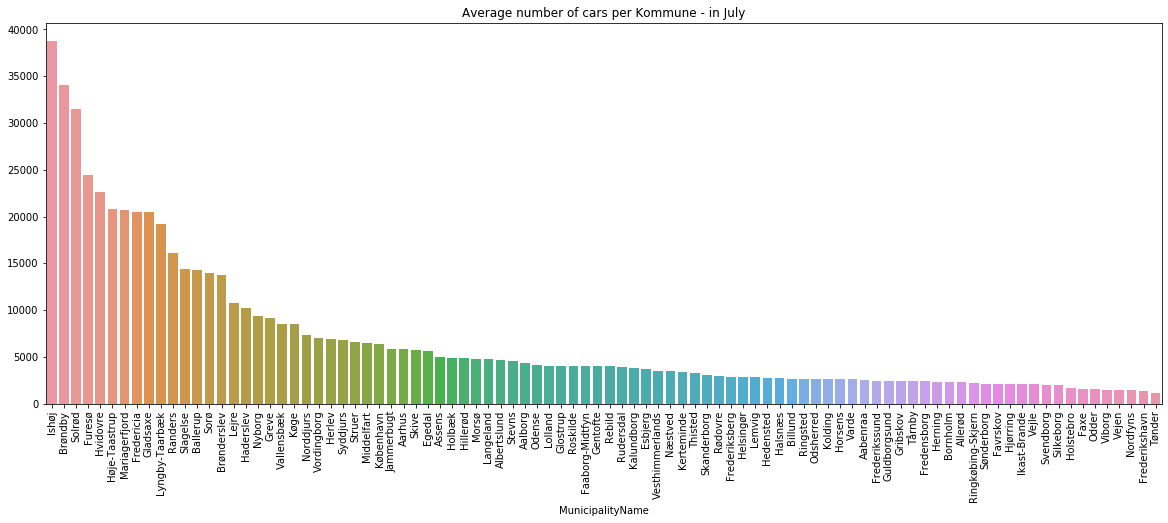

In [132]:
#Considering all days of the year
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - considering all days of the year")
df = traffic_data.groupby('MunicipalityName').AverageDailyVehicles.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#Excluding weekends, summer and holidays
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - excluding weekends, summer and holidays")
df = traffic_data.groupby('MunicipalityName').AverageWeekdayDailyVehicles.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#Considering only July
plt.figure(figsize=(20,7))
plt.title("Average number of cars per Kommune - in July")
df = traffic_data.groupby('MunicipalityName').DailyJulyTraffic.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#### Comparing the number of cars in July vs a working day
Some kommunes (values <1, on the left) experience a drop in traffic in July (business areas?), some (values >1, on the right) experience an increase in traffic in July (holiday destinations?).

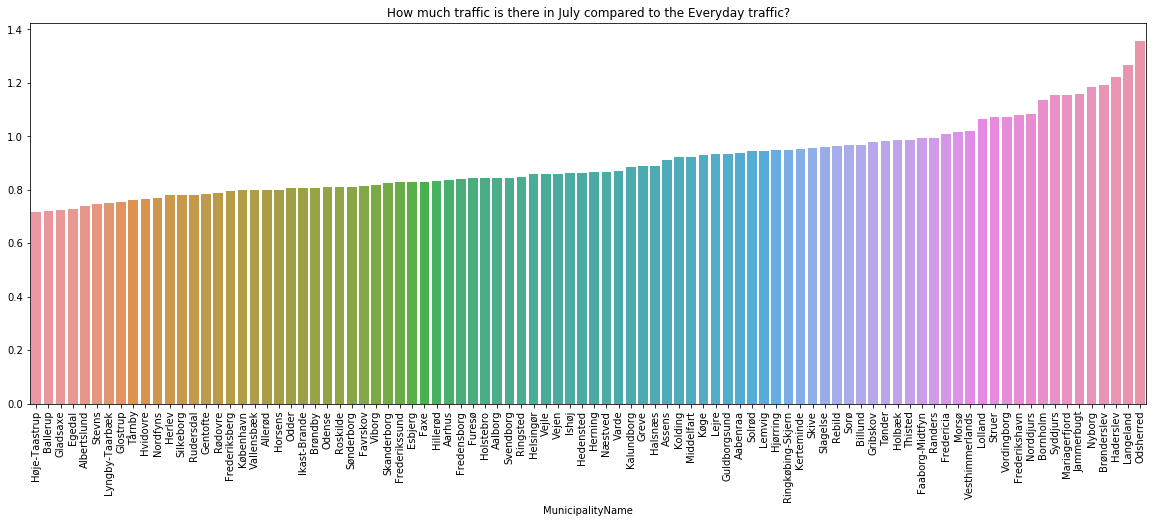

In [133]:
plt.figure(figsize=(20,7))
plt.title("How much traffic is there in July compared to the Everyday traffic?")
df = (traffic_data.groupby('MunicipalityName').DailyJulyTraffic.mean() / traffic_data.groupby('MunicipalityName').AverageWeekdayDailyVehicles.mean()).sort_values()
ax = sns.barplot(df.keys(), df.values)
plt.setp(ax.get_xticklabels(), rotation=90);

#### Traffic types 

I am not sure what BO-ARB means. "Bo og arbejde" = Live and work?

How is that different than BY (city?)


/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 134 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 152 missing from current font.
  font.set_text(s, 0, flags=flags)


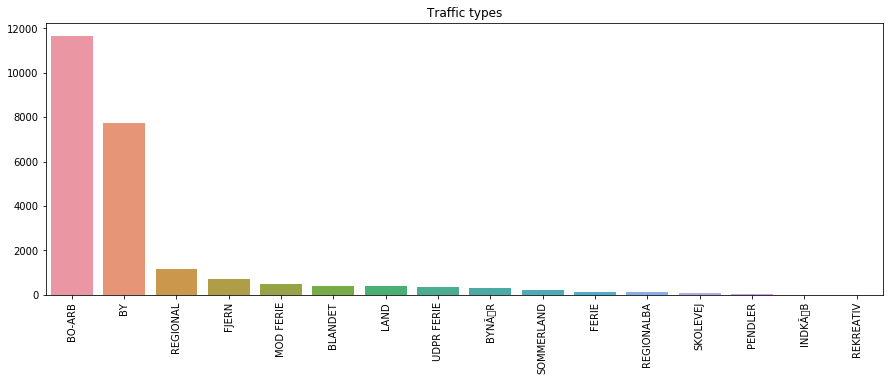

In [134]:
plt.figure(figsize=(15,5))
plt.title("Traffic types")
df = traffic_data.Traffictype.value_counts()
ax = sns.barplot(df.keys(), df.values)
plt.setp(ax.get_xticklabels(), rotation=90);

#### Speed

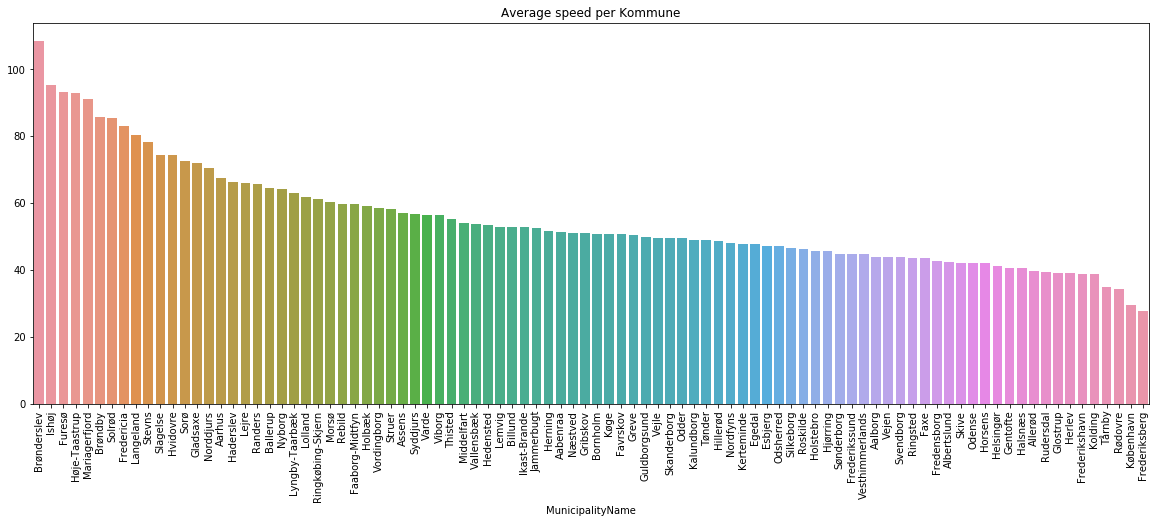

In [135]:
plt.figure(figsize=(20,7))
plt.title("Average speed per Kommune")
df = traffic_data.groupby('MunicipalityName').AverageSpeed.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

#### Trucks

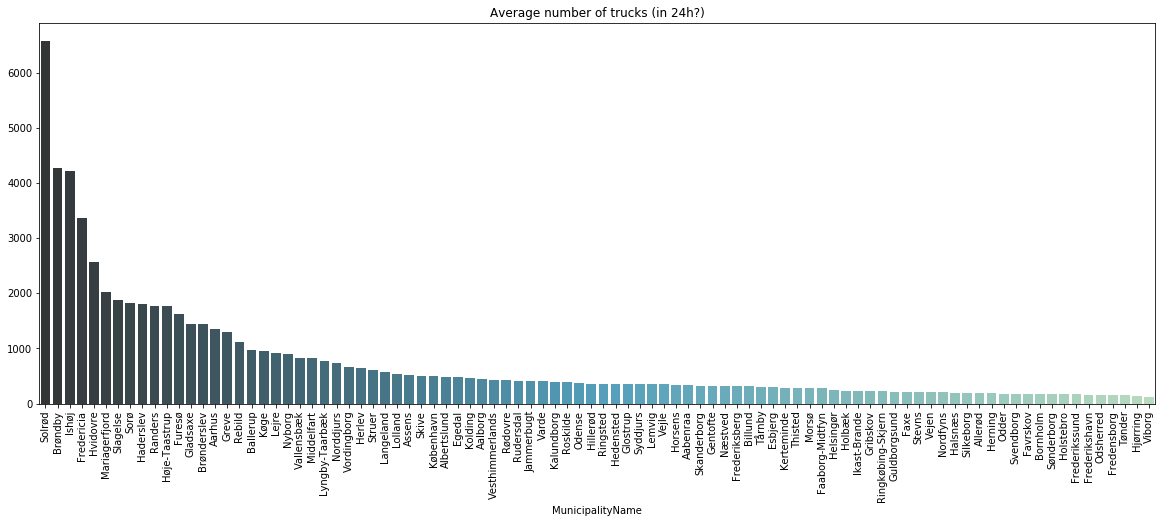

In [136]:
plt.figure(figsize=(20,7))
plt.title("Average number of trucks (in 24h?)")
df = traffic_data.groupby('MunicipalityName').AverageDailyTrucks.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

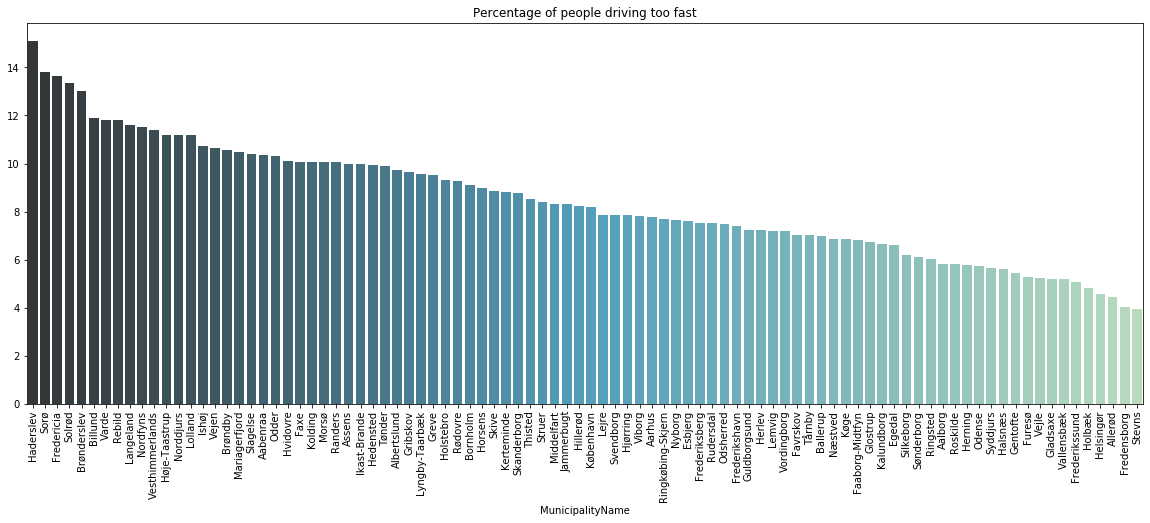

In [137]:
plt.figure(figsize=(20,7))
plt.title("Percentage of people driving too fast")
df = traffic_data.groupby('MunicipalityName').PctOfTrucks.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys(), palette="GnBu_d")
plt.setp(ax.get_xticklabels(), rotation=90);

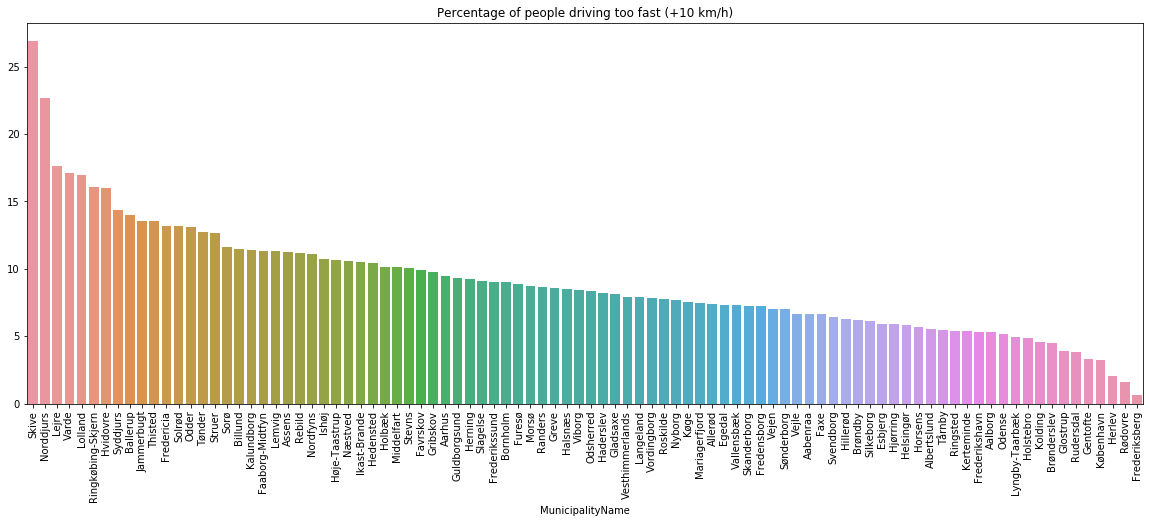

In [138]:
plt.figure(figsize=(20,7))
plt.title("Percentage of people driving too fast (+10 km/h)")
df = traffic_data.groupby('MunicipalityName').PctOverSpeedLimit10.mean().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

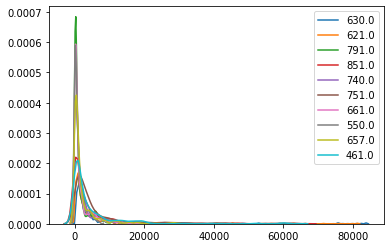

In [139]:
#Work in progress
for i in traffic_data.Municipality.value_counts().head(10).keys():
    sns.kdeplot(traffic_data[traffic_data.Municipality == i]["AverageDailyVehicles"], label= i )

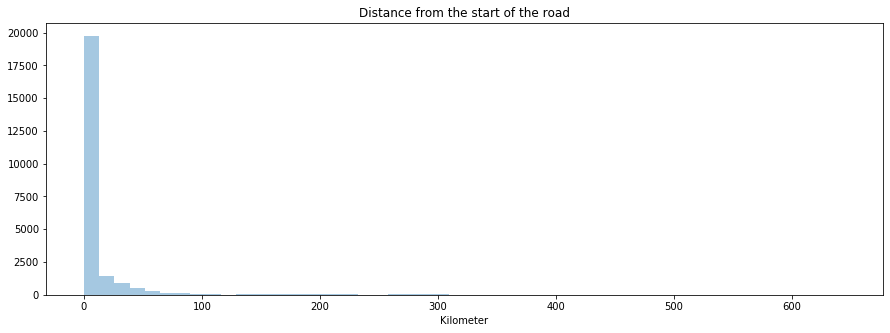

In [140]:
plt.figure(figsize=(15,5))
plt.title("Distance from the start of the road")
sns.distplot(traffic_data.Kilometer, kde = False)

### Data manipulation

#### Selection focus municipalities

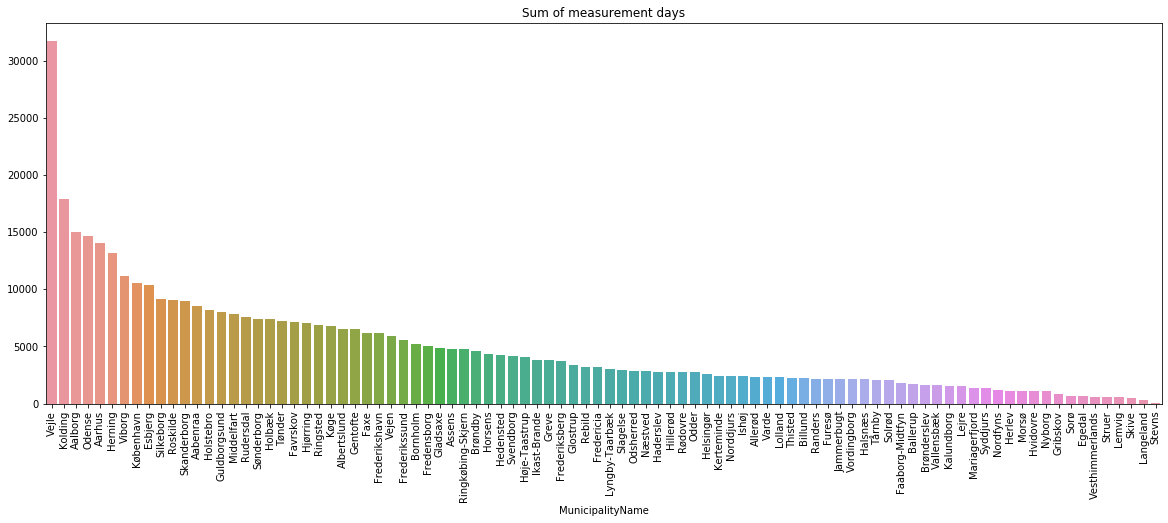

In [141]:
plt.figure(figsize=(20,7))
plt.title("Sum of measurement days")
df = traffic_data.groupby('MunicipalityName').CountedDays.sum().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

In [142]:
base = 3
traffic_data["CountedDaysLog"]= np.log(traffic_data.CountedDays+1) / np.log(base)

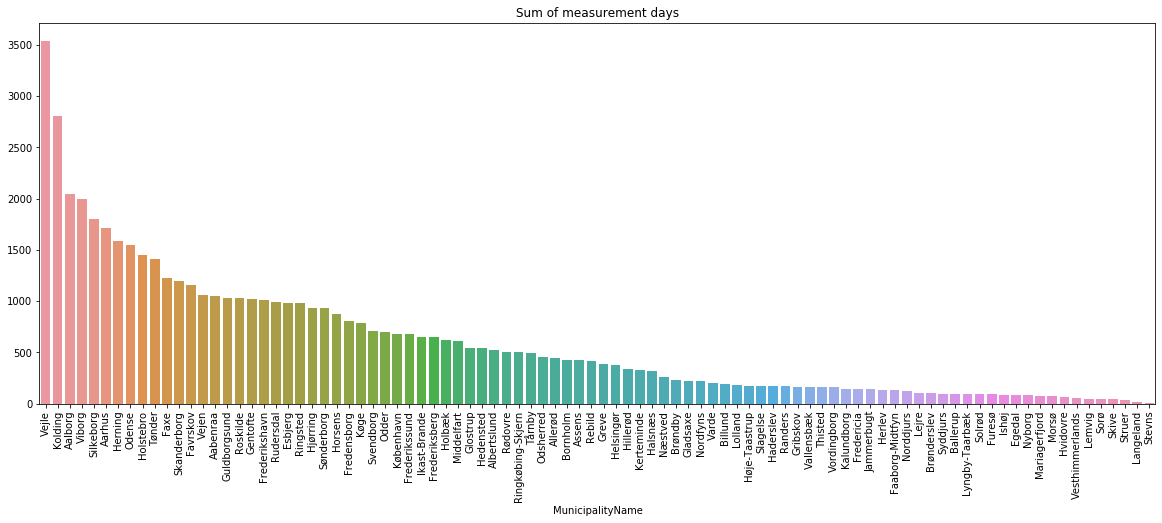

In [143]:
plt.figure(figsize=(20,7))
plt.title("Sum of measurement days")
df = traffic_data.groupby('MunicipalityName').CountedDaysLog.sum().sort_values(ascending = False)
ax = sns.barplot(df.keys(), df.values, order = df.keys())
plt.setp(ax.get_xticklabels(), rotation=90);

In [144]:
focusmunicipalitiessize = 14
mostcountedlog = traffic_data.groupby('MunicipalityName').CountedDaysLog.sum().sort_values(ascending = False)
mostcounted = traffic_data.groupby('MunicipalityName').CountedDays.sum().sort_values(ascending = False)
newmun = (set(mostcountedlog[:focusmunicipalitiessize].index) - set(mostcounted[:focusmunicipalitiessize].index))
lostmun = (set(mostcounted[:focusmunicipalitiessize].index) - set(mostcountedlog[:focusmunicipalitiessize].index))

In [145]:
lostmun

{'Aabenraa', 'Esbjerg', 'København', 'Roskilde'}

In [146]:
newmun

{'Favrskov', 'Faxe', 'Tønder', 'Vejen'}

In [147]:
focusmunicipalities = mostcountedlog[:focusmunicipalitiessize].index

In [148]:
focusmunicipalities

Index(['Vejle', 'Kolding', 'Aalborg', 'Viborg', 'Silkeborg', 'Aarhus',
       'Herning', 'Odense', 'Holstebro', 'Tønder', 'Faxe', 'Skanderborg',
       'Favrskov', 'Vejen'],
      dtype='object', name='MunicipalityName')

### New variables

In [154]:
traffic_data = traffic_data.dropna(subset=['SpeedLimit', 'AverageSpeed'])
traffic_data = traffic_data.astype({'SpeedLimit': 'float64'})

In [156]:
traffic_data["AvarageSpeedToSpeedLimit"] = traffic_data.AverageSpeed - traffic_data.SpeedLimit

In [158]:
traffic_data["JulyWeekdaysRatio"] = traffic_data.DailyJulyTraffic / traffic_data.AverageWeekdayDailyVehicles

### Plot variables against focus municipalities

In [167]:
data_to_focus = traffic_data[traffic_data.MunicipalityName.isin(focusmunicipalities)]
data_to_focus = data_to_focus[data_to_focus.Year > 2012]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a37144850>,
      dtype=object)

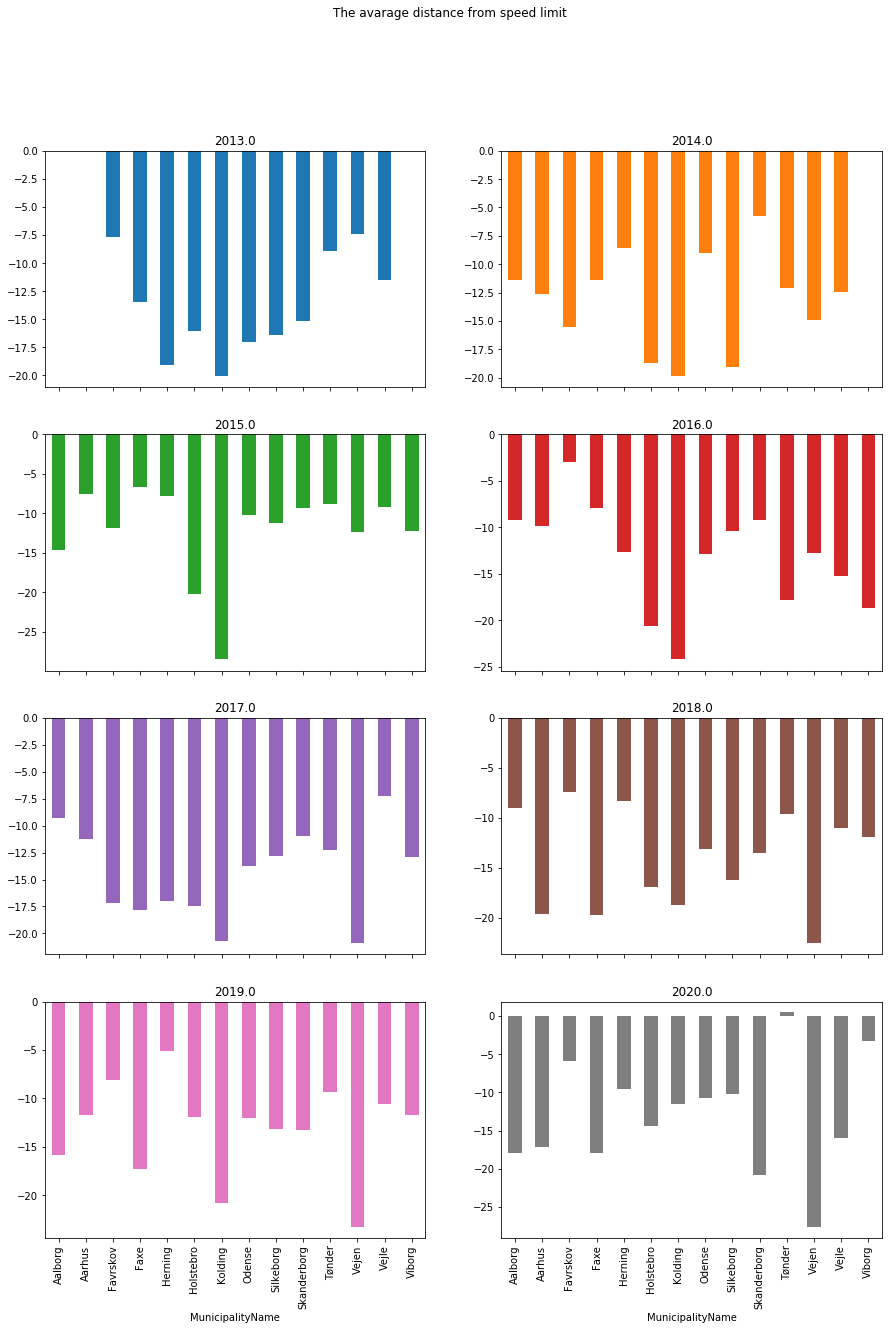

In [172]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['AvarageSpeedToSpeedLimit'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='The avarage distance from speed limit')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a379eee50>,
      dtype=object)

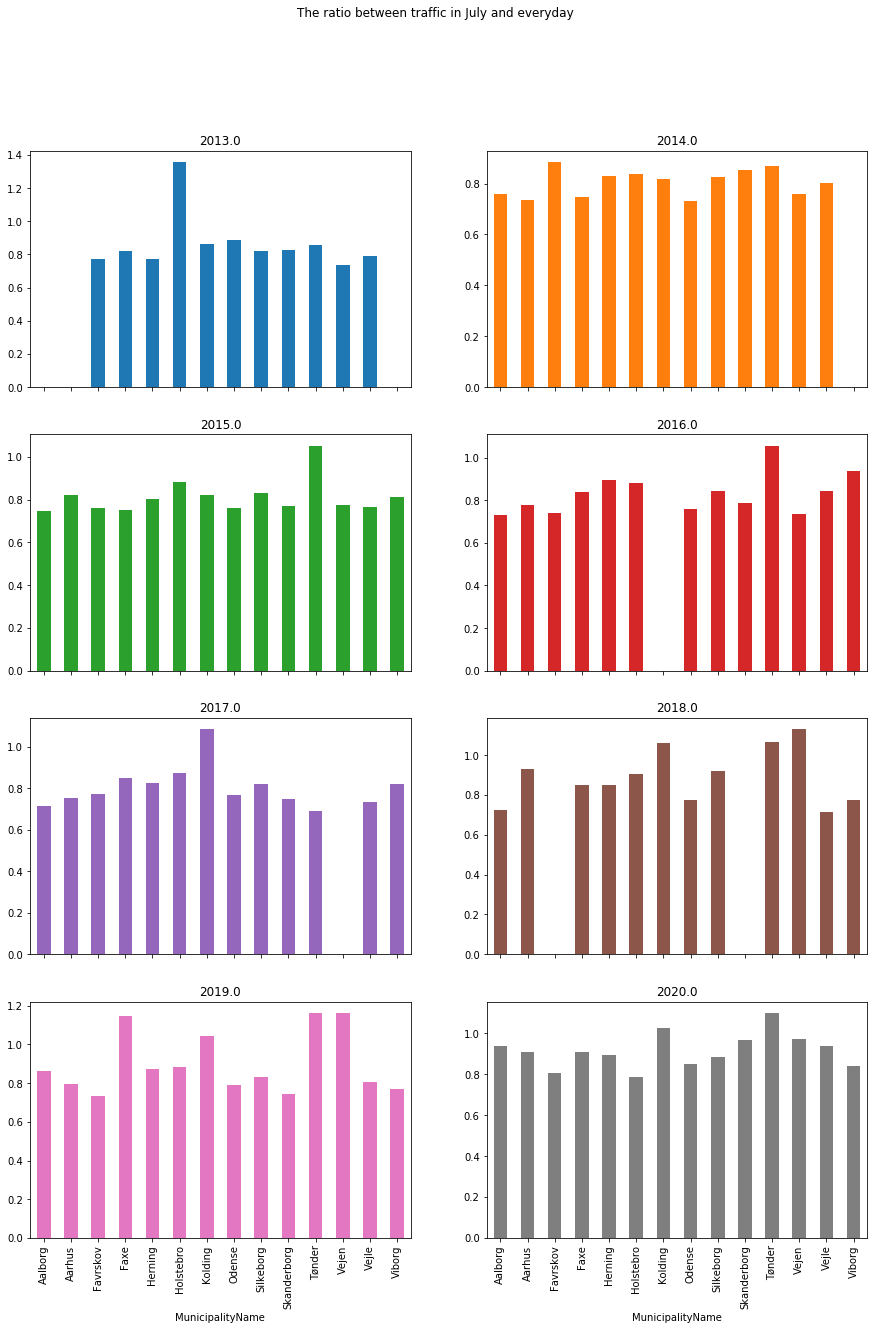

In [175]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['JulyWeekdaysRatio'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='The ratio between traffic in July and everyday')

Tonder and Koling seem to have an increase!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a364a9d10>,
      dtype=object)

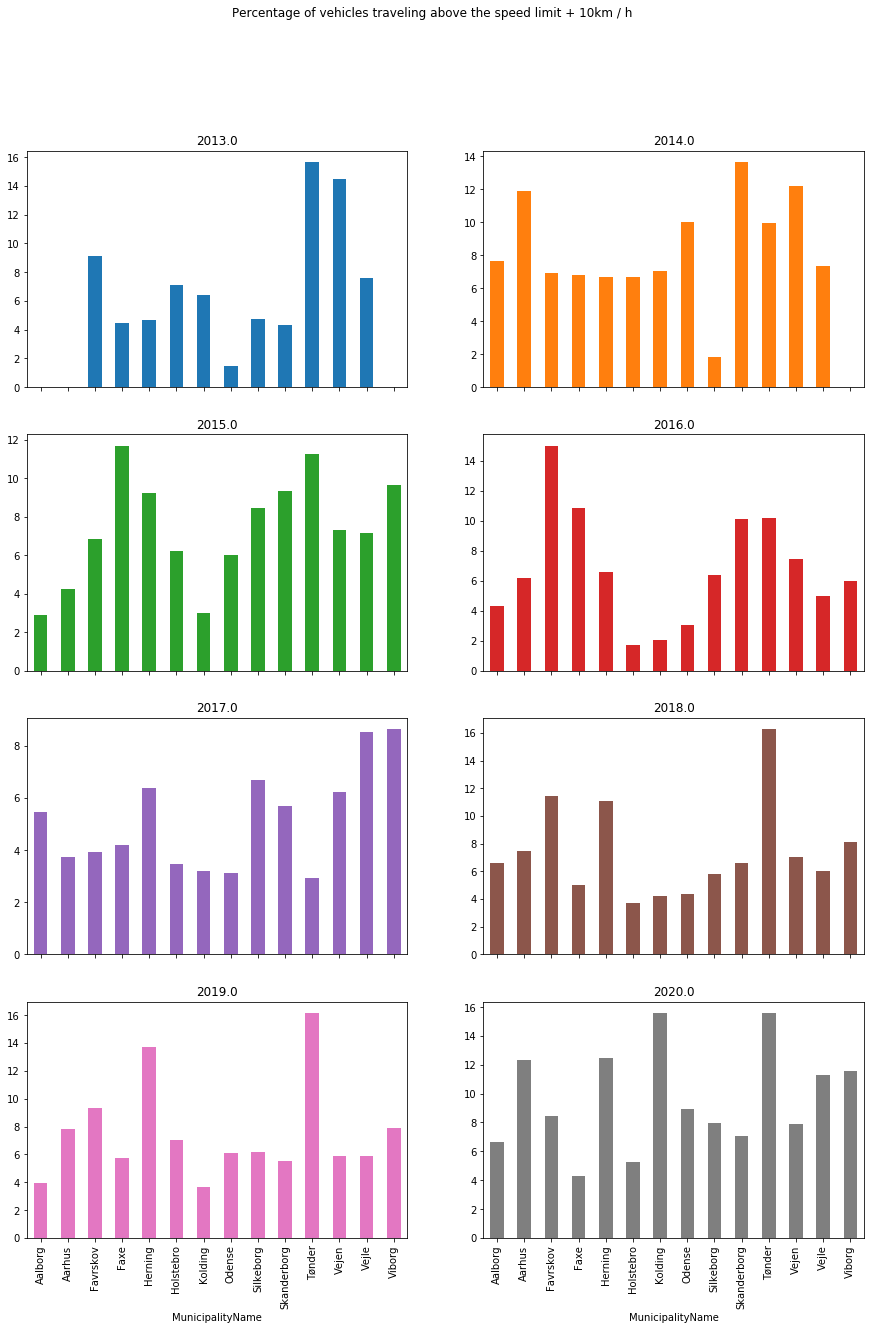

In [177]:
focus_counth =data_to_focus.groupby(['MunicipalityName', 'Year'])['PctOverSpeedLimit10'].mean()
focus_counth.unstack().plot.bar(subplots=True,layout=(4,2), figsize=(15,20), legend=False, title='Percentage of vehicles traveling above the speed limit + 10km / h')